In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
#Load intial Data
wi_df = pd.read_csv("Data/AbsenteeCounts_County WI.csv")
wi_age_demo = pd.read_csv("Data/RegisteredVotersByAgeGroup.csv")
wi_age_demo.dropna()
wi_age_demo.columns = ["Age Group", "Registered Voters","Per of Population"]
wi_age_demo = wi_age_demo.dropna()
wi_age_trend = pd.read_csv("Data/VotingTrendWI.csv")
wi_age_trend.dropna()

,Age Group,DEM,REP,OTHERS
0,18-24,36,58,6
1,25-34,45,53,2
2,35-49,52,47,1
3,50-64,52,47,1
4,65+,53,47,0


In [3]:
#Summary Counts
AbsenteeReturned = wi_df["BallotsReturned"].sum()
EarlyInPerson =  wi_df["InPersonAbsentee"].sum()
TotalEarly = AbsenteeReturned + EarlyInPerson

print(f"Total Absentee voted       : {AbsenteeReturned}")
print(f"Total Early In Person voted: {EarlyInPerson}")
print(f"------------------------------------------")
print(f"Total Early Votes          : {TotalEarly}")


Total Absentee voted       : 3910028
Total Early In Person voted: 1302390
------------------------------------------
Total Early Votes          : 5212418


In [4]:
# Voter Population By Age
wi_age_demo.dropna()
wi_age_demo["EV by Age"] = 0.01
wi_age_demo.dropna()
for i, row in wi_age_demo.iterrows():
    wi_age_demo.at[i,"EV by Age"] = (float(row["Per of Population"])/100)*int(TotalEarly)
wi_age_demo

,Age Group,Registered Voters,Per of Population,EV by Age
0,18-24,"346,498",9.42,4.910098e+05
1,25-34,"556,117",15.11,7.875964e+05
2,35-49,"822,349",22.35,1.164975e+06
3,50-64,"1,000,526",27.19,1.417256e+06
4,65+,"953,968",25.93,1.351580e+06


In [5]:
#Vote Split by Party
wi_age = pd.merge(wi_age_demo,wi_age_trend)
wi_age

,Age Group,Registered Voters,Per of Population,EV by Age,DEM,REP,OTHERS
0,18-24,"346,498",9.42,4.910098e+05,36,58,6
1,25-34,"556,117",15.11,7.875964e+05,45,53,2
2,35-49,"822,349",22.35,1.164975e+06,52,47,1
3,50-64,"1,000,526",27.19,1.417256e+06,52,47,1
4,65+,"953,968",25.93,1.351580e+06,53,47,0


In [6]:
wi_vote = wi_age
wi_vote["DemVote"] =  0.01
wi_vote["RepVote"] =  0.02
wi_vote["OtherVote"] =  0.03


In [7]:
wi_vote

,Age Group,Registered Voters,Per of Population,EV by Age,DEM,REP,OTHERS,DemVote,RepVote,OtherVote
0,18-24,"346,498",9.42,4.910098e+05,36,58,6,0.01,0.02,0.03
1,25-34,"556,117",15.11,7.875964e+05,45,53,2,0.01,0.02,0.03
2,35-49,"822,349",22.35,1.164975e+06,52,47,1,0.01,0.02,0.03
3,50-64,"1,000,526",27.19,1.417256e+06,52,47,1,0.01,0.02,0.03
4,65+,"953,968",25.93,1.351580e+06,53,47,0,0.01,0.02,0.03


In [9]:
#Vote Share by Party
for i, row in wi_vote.iterrows():
    wi_vote.at[i,"DemVote"] = int(wi_vote.at[i,"EV by Age"]*wi_vote.at[i,"DEM"]/100)
    wi_vote.at[i,"RepVote"] = int(wi_vote.at[i,"EV by Age"]*wi_vote.at[i,"REP"]/100)
    wi_vote.at[i,"OtherVote"] = int(wi_vote.at[i,"EV by Age"]*wi_vote.at[i,"OTHERS"]/100)
wi_vote

,Age Group,Registered Voters,Per of Population,EV by Age,DEM,REP,OTHERS,DemVote,RepVote,OtherVote
0,18-24,"346,498",9.42,4.910098e+05,36,58,6,176763.0,284785.0,29460.0
1,25-34,"556,117",15.11,7.875964e+05,45,53,2,354418.0,417426.0,15751.0
2,35-49,"822,349",22.35,1.164975e+06,52,47,1,605787.0,547538.0,11649.0
3,50-64,"1,000,526",27.19,1.417256e+06,52,47,1,736973.0,666110.0,14172.0
4,65+,"953,968",25.93,1.351580e+06,53,47,0,716337.0,635242.0,0.0


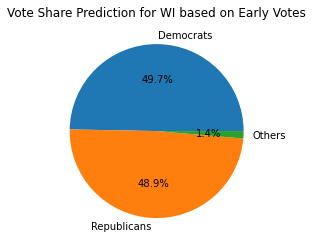

In [19]:
dem_vote =  wi_vote["DemVote"].sum()
rep_vote =  wi_vote["RepVote"].sum()
oth_vote =  wi_vote["OtherVote"].sum()
plot_val = [dem_vote, rep_vote,oth_vote]
plot_label = ["Democrats","Republicans","Others"]
plt.pie(plot_val,labels=plot_label,autopct='%1.1f%%')
plt.title('Vote Share Prediction for WI based on Early Votes')

plt.show()

